In [1]:
import numpy as np
import pandas as pd
import PIL as pl
import cv2 as cv
import pytesseract as ts

## Loading Files from Disk

In [2]:
img_pl = pl.Image.open('/opt/Python/pyOCR/images/card_46.jpg')

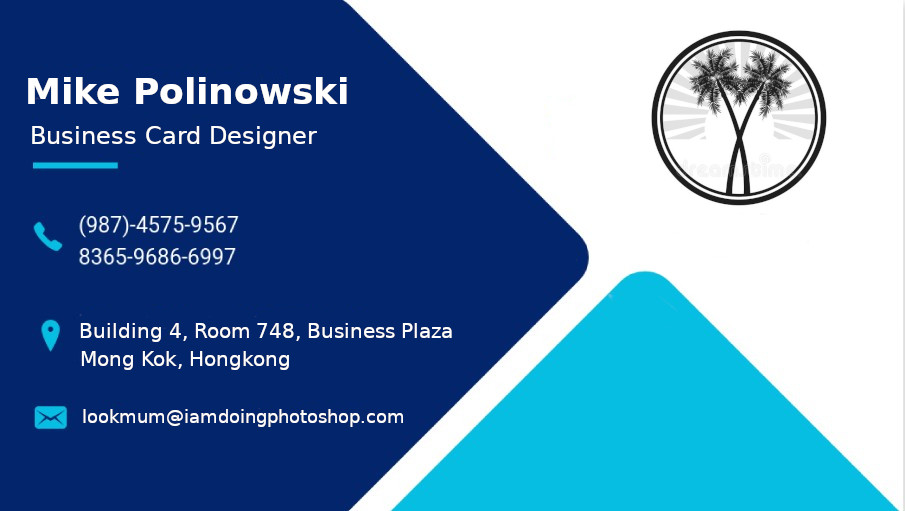

In [3]:
img_pl

In [4]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
img_cv = cv.imread('/opt/Python/pyOCR/images/card_46.jpg')
# cv.startWindowThread()

In [6]:
# type(img_cv)

In [7]:
# cv.imshow('Business Card',img_cv)
# cv.waitKey(0)
# cv.destoyAllWindows()
# cv.waitKey(1)

## Text Extration

In [8]:
text_pl = ts.image_to_string(img_pl)

In [9]:
print(text_pl)

   
   
 

Mike Polinowski
Business Card Designer

(987)-4575-9567
8365-9686-6997

Building 4, Room 748, Business Plaza
Mong Kok, Hongkong

lookmum@iamdoingphotoshop.com



In [10]:
data = ts.image_to_data(img_pl)

In [11]:
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))

In [12]:
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [13]:
df.head(15)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,905,511,-1,
1,2,1,1,0,0,0,340,0,565,511,-1,
2,3,1,1,1,0,0,340,0,565,511,-1,
3,4,1,1,1,1,0,340,0,565,314,-1,
4,5,1,1,1,1,1,340,0,565,314,95,
5,4,1,1,1,2,0,403,314,502,122,-1,
6,5,1,1,1,2,1,403,314,502,122,95,
7,4,1,1,1,3,0,345,436,560,75,-1,
8,5,1,1,1,3,1,345,436,560,75,95,
9,2,1,2,0,0,0,28,77,319,72,-1,


In [14]:
df.dropna(inplace=True) # Drop empty values and rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(int) # Change all columns with number values to type int

## Draw Bounding Boxes

In [ ]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,t in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    
    if level == 'page':
          if l == 1:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,0,0,),2)
          else:
            continue
            
    elif level == 'block':
          if l == 2:
                cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0,),1)
          else:
            continue
            
    elif level == 'paragraph':
          if l == 3:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0,),1)
          else:
            continue
            
    elif level == 'line':
          if l == 4:
                cv.rectangle(image,(x,y),(x+w,y+h),(255,0,51,),1)
          else:
            continue
            
    elif level == 'word':
          if l == 5:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,0,255,),1)
                cv.putText(image,t,(x,y),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(255,255,255),1)
          else:
            continue
                             
cv.imshow("bounding box",image)
cv.waitKey(0)
cv.destoyAllWindows()
cv.waitKey(1)